<a href="https://colab.research.google.com/github/MD2001/Pytorch_Bignnier/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

02. Neural Network classification with PyTorch
Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options).
Book version of this notebook https://www.learnpytorch.io/02_pytorch_classification/

All other resources - https://github.com/mrdbourke/pytorch-deep-learning

Stuck? Ask a question https://github.com/mrdbourke/pytorch-deep-learning/
discussions

In [1]:
import sklearn

#Data

In [2]:
from sklearn.datasets import make_circles

n_samples = 3000

X,Y =make_circles(n_samples,
                  noise=0.03,
                  random_state=42)

print(f"first five element from X : \n{X[:5]}")
print(f"first five element from Y : \n{Y[:5]}")


first five element from X : 
[[ 0.20461446  0.7444964 ]
 [ 0.24036431 -0.97227107]
 [ 0.23168086  0.76518771]
 [ 0.4850385   0.86762023]
 [-0.39757169 -0.70306708]]
first five element from Y : 
[1 0 1 0 1]


In [3]:
# visualise data
import pandas as pd
circles = pd.DataFrame({
                          "X1" : X[:,0],
                          "X2" : X[:,1],
                          "labels"  : Y[:]
})
circles.head(10)

,X1,X2,labels
0,0.204614,0.744496,1
1,0.240364,-0.972271,0
2,0.231681,0.765188,1
3,0.485038,0.867620,0
4,-0.397572,-0.703067,1
5,-0.017278,-0.972896,0
6,0.961407,-0.302521,0
7,-0.654767,0.501339,1
8,-0.161085,1.053200,0
9,-0.164607,-0.793656,1


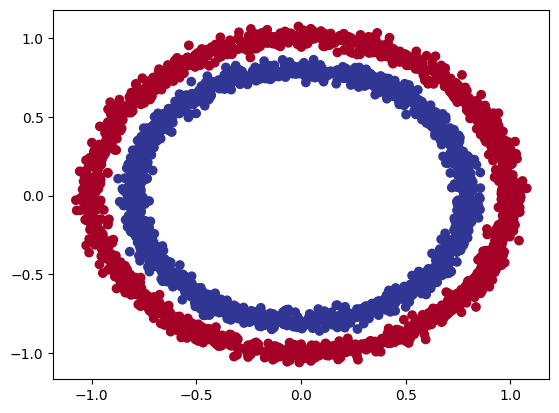

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=Y[:],
            cmap=plt.cm.RdYlBu)

after visualize data i assume it two circle and the input is coordinate to determine which do belonge to witch circle

In [5]:
type(X) , X.dtype

(numpy.ndarray, dtype('float64'))

In [6]:
import torch
#convert it to tensors
X=torch.from_numpy(X).type(torch.float)
Y=torch.from_numpy(Y).type(torch.float)

In [7]:
type(X) , X.dtype

(torch.Tensor, torch.float32)

In [8]:
print(f"this is one sample of X: {X[0]} and this its label Y :{Y[0]}")
print(f"this is the shape of X {X.shape} and this is the shape of Y {Y.shape}")

this is one sample of X: tensor([0.2046, 0.7445]) and this its label Y :1.0
this is the shape of X torch.Size([3000, 2]) and this is the shape of Y torch.Size([3000])


In [9]:
#to split the data
from sklearn.model_selection import train_test_split

x_train , x_test , y_train, y_test =train_test_split(X,Y,test_size=0.2,random_state=42)


In [10]:
len(x_train) , len(x_test) , len(y_train), len(y_test)

(2400, 600, 2400, 600)

##2. Building a model
Let's build a model to classify our blue and red dots.
To do do so, we want to:
1. Setup device agonistic code so our code code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [11]:
#device digonistic code

device ="cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

In [12]:
#create model

from torch import nn

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=8)
    self.layer_2=nn.Linear(in_features=8,out_features=1)
  def forwared(self, x :torch.Tensor)->torch.Tensor:
    return self.layer_2(self.layer_1(x))


### another way to do the same using nn.Sequebatial()

# class CircleModelV0(nn.Module):
#   def __init__(self):
#     super().__init__()

#     self.layerofTwo=nn.Sequential(
#         nn.Linear(in_features=2,out_features=8),
#         nn.Linear(in_features=8,out_features=1)
#     )


#   def forwared(self, x :torch.Tensor)->torch.Tensor:
#     return self.layerofTwo(x)

In [13]:
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=1, bias=True)
)

In [14]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [15]:
x_train=x_train.to(device)
x_test=x_test.to(device)
y_train=y_train.to(device)
y_test=y_test.to(device)
x_train.device

device(type='cuda', index=0)

In [16]:
## lets rewrite same code in less codeing
model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=8),
    nn.Linear(in_features=8,out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=1, bias=True)
)

In [17]:
next(model_0.parameters()).device

device(type='cuda', index=0)